In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# To load a pretrained model and a tokenizer using HuggingFace, we only need two lines of code!
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# We create a partial sentence and tokenize it.
text = "Udacity is the best place to learn about generative"
inputs = tokenizer(text, return_tensors="pt")

# Show the tokens as numbers, i.e. "input_ids"
inputs["input_ids"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tensor([[  52,   67, 4355,  318,  262, 1266, 1295,  284, 2193,  546, 1152,  876]])

In [ ]:
# Show how the sentence is tokenized
import pandas as pd


def show_tokenization(inputs):
    return pd.DataFrame(
        [(id, tokenizer.decode(id)) for id in inputs["input_ids"][0]],
        columns=["id", "token"],
    )


show_tokenization(inputs)

,id,token
0,tensor(52),U
1,tensor(67),d
2,tensor(4355),acity
3,tensor(318),is
4,tensor(262),the
5,tensor(1266),best
6,tensor(1295),place
7,tensor(284),to
8,tensor(2193),learn
9,tensor(546),about


In [ ]:
# Calculate the probabilities for the next token for all possible choices. We show the
# top 5 choices and the corresponding words or subwords for these tokens.

import torch

with torch.no_grad():
    logits = model(**inputs).logits[:, -1, :]
    probabilities = torch.nn.functional.softmax(logits[0], dim=-1)


def show_next_token_choices(probabilities, top_n=5):
    return pd.DataFrame(
        [
            (id, tokenizer.decode(id), p.item())
            for id, p in enumerate(probabilities)
            if p.item()
        ],
        columns=["id", "token", "p"],
    ).sort_values("p", ascending=False)[:top_n]


show_next_token_choices(probabilities)

,id,token,p
8300,8300,programming,0.157599
4673,4673,learning,0.148413
4981,4981,models,0.048504
17219,17219,biology,0.046482
16113,16113,algorithms,0.027794


In [ ]:
# Obtain the token id for the most probable next token
next_token_id = torch.argmax(probabilities).item()

print(f"Next token id: {next_token_id}")
print(f"Next token: {tokenizer.decode(next_token_id)}")


Next token id: 8300
Next token:  programming


In [ ]:
# We append the most likely token to the text.
text = text + tokenizer.decode(8300)
text

'Udacity is the best place to learn about generative programming'

In [ ]:
# Press ctrl + enter to run this cell again and again to see how the text is generated.

from IPython.display import Markdown, display

# Show the text
print(text)

# Convert to tokens
inputs = tokenizer(text, return_tensors="pt")

# Calculate the probabilities for the next token and show the top 5 choices
with torch.no_grad():
    logits = model(**inputs).logits[:, -1, :]
    probabilities = torch.nn.functional.softmax(logits[0], dim=-1)

display(Markdown("**Next token probabilities:**"))
display(show_next_token_choices(probabilities))

# Choose the most likely token id and add it to the text
next_token_id = torch.argmax(probabilities).item()
text = text + tokenizer.decode(next_token_id)

Udacity is the best place to learn about generative programming


**Next token probabilities:**

,id,token,p
13,13,.,0.352224
11,11,",",0.135987
290,290,and,0.109371
287,287,in,0.069531
8950,8950,languages,0.058290


In [ ]:
from IPython.display import Markdown, display

# Start with some text and tokenize it
text = "Once upon a time, generative models"
inputs = tokenizer(text, return_tensors="pt")

# Use the `generate` method to generate lots of text
output = model.generate(**inputs, max_length=100, pad_token_id=tokenizer.eos_token_id)

# Show the generated text
display(Markdown(tokenizer.decode(output[0])))

Once upon a time, generative models of the human brain were used to study the neural correlates of cognitive function. In the present study, we used a novel model of the human brain to investigate the neural correlates of cognitive function. We used a novel model of the human brain to investigate the neural correlates of cognitive function. We used a novel model of the human brain to investigate the neural correlates of cognitive function. We used a novel model of the human brain to investigate the neural correlates of cognitive function.

Training set size: 60000
Test set size: 10000


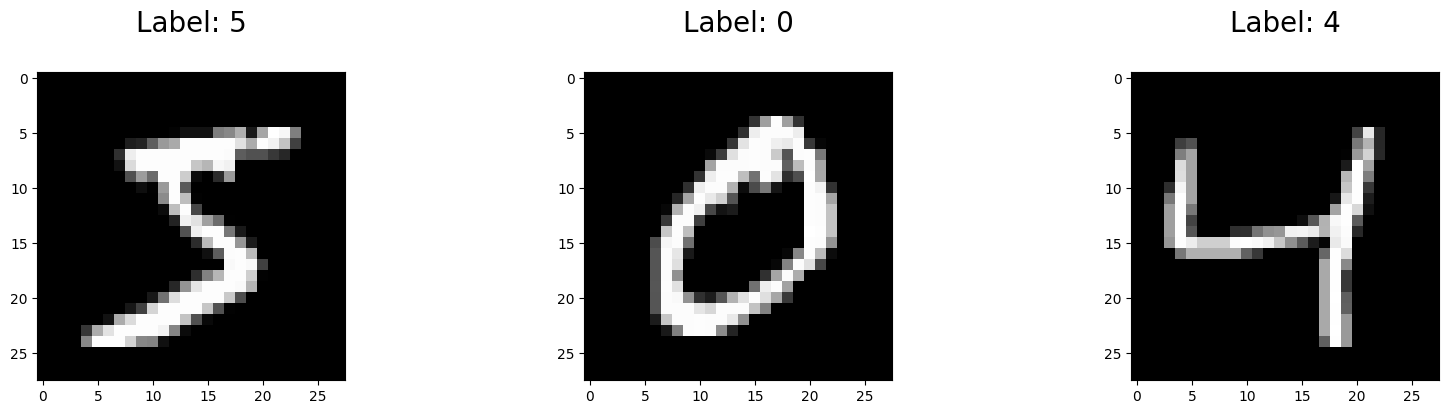

In [ ]:
# Load MNIST using sklearn.datasets.fetch_openml

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")

# Split into train and test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Convert to numpy arrays and scale for the model
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train, dtype=np.int8)
y_test = np.array(y_test, dtype=np.int8)

# Show the first 3 images
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X_train[0:3], y_train[0:3])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title("Label: %s\n" % label, fontsize=20)

In [ ]:
# Train an MLP classifier using sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier object
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)


# Train the MLPClassifier
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [ ]:
# Show the accuracy on the training and test sets

print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Training set score: 0.9868
Test set score: 0.97


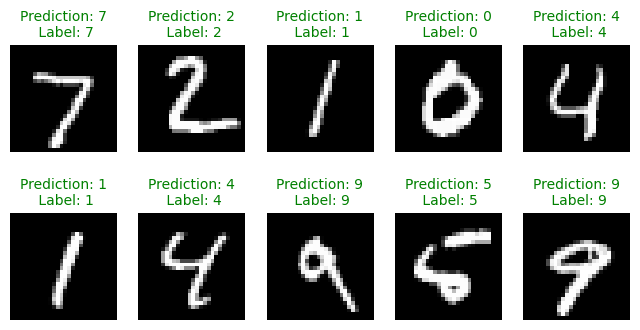

In [ ]:
# Show the images, predictions, and original labels for 10 images

# Get the predictions for the test dataset
predictions = mlp.predict(X_test)

# Show the predictions in a grid
plt.figure(figsize=(8, 4))

for index, (image, prediction, label) in enumerate(
    zip(X_test[0:10], predictions[0:10], y_test[0:10])
):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    # Green if correct, red if incorrect
    fontcolor = "g" if prediction == label else "r"
    plt.title(
        "Prediction: %i\n Label: %i" % (prediction, label), fontsize=10, color=fontcolor
    )

    plt.axis("off")  # hide axes

In [ ]:
import torch

# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]


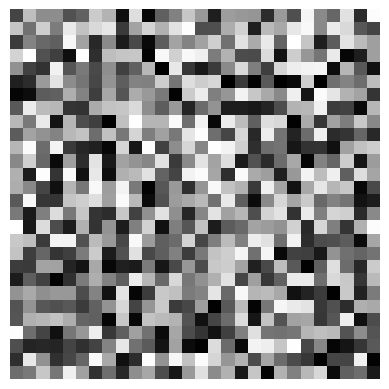

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap='gray')
plt.axis('off') # disable axes
plt.show()

In [ ]:
a = torch.tensor([[1, 1], [1, 0]])

print(a)
# tensor([[1, 1],
#         [1, 0]])

print(torch.matrix_power(a, 2))
# tensor([[2, 1],
#         [1, 1]])

print(torch.matrix_power(a, 3))
# tensor([[3, 2],
#         [2, 1]])

print(torch.matrix_power(a, 4))
# tensor([[5, 3],
#         [3, 2]])

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


In [ ]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 64)
        self.output_layer = nn.Linear(64, 2)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

model = MLP(input_size=10)
print(model)
# MLP(
#   (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
#   (output_layer): Linear(in_features=64, out_features=2, bias=True)
#   (activation): ReLU()
# )

model.forward(torch.rand(10))
# tensor([0.2294, 0.2650], grad_fn=<AddBackward0>)

In [ ]:
import torch
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()

# Our dataset contains a single image of a dog, where
# cat = 0 and dog = 1 (corresponding to index 0 and 1)
target_tensor = torch.tensor([1])
target_tensor
# tensor([1])

tensor([1])

In [ ]:
# Note that the values do not need to sum to 1
predicted_tensor = torch.tensor([[2.0, 5.0]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# tensor(0.0181)

tensor(0.0486)

In [ ]:
predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# tensor(0.9130)

tensor(0.9130)

In [ ]:
# Define the loss function
loss_function = nn.MSELoss()

# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item()) # Loss value: 20000 * 20000 / 1 = ...
# 400000000.0

400000000.0


In [ ]:
import torch.optim as optim


In [ ]:
# momentum=0.9 smoothes out updates and can help training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


NameError: name 'model' is not defined

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# See how many tokens are in the vocabulary
tokenizer.vocab_size
# 30522

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

30522

In [ ]:
# Tokenize the sentence
tokens = tokenizer.tokenize("I heart Generative AI")

# Print the tokens
print(tokens)
# ['i', 'heart', 'genera', '##tive', 'ai']

# Show the token ids assigned to each token
print(tokenizer.convert_tokens_to_ids(tokens))
# [1045, 2540, 11416, 6024, 9932]

['i', 'heart', 'genera', '##tive', 'ai']
[1045, 2540, 11416, 6024, 9932]


In [ ]:
tokens = tokenizer.tokenize("My name Is Mayank")
print(tokens)
print(tokenizer.convert_tokens_to_ids(tokens))

['my', 'name', 'is', 'maya', '##nk']
[2026, 2171, 2003, 9815, 8950]


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load a pre-trained sentiment analysis model
model_name = "textattack/bert-base-uncased-imdb"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the input sequence
tokenizer = BertTokenizer.from_pretrained(model_name)
inputs = tokenizer("I love Generative AI", return_tensors="pt")

# Make prediction
with torch.no_grad():
    outputs = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities)

# Display sentiment result
if predicted_class == 1:
    print(f"Sentiment: Positive ({probabilities[0][1] * 100:.2f}%)")
else:
    print(f"Sentiment: Negative ({probabilities[0][0] * 100:.2f}%)")
# Sentiment: Positive (88.68%)

Sentiment: Positive (88.68%)


In [ ]:
from datasets import load_dataset
from IPython.display import HTML, display

# Load the IMDB dataset, which contains movie reviews
# and sentiment labels (positive or negative)
dataset = load_dataset("imdb")

# Fetch a revie from the training set
review_number = 42
sample_review = dataset["train"][review_number]

display(HTML(sample_review["text"][:450] + "..."))
# WARNING: This review contains SPOILERS. Do not read if you don't want some points revealed to you before you watch the
# film.
#
# With a cast like this, you wonder whether or not the actors and actresses knew exactly what they were getting into. Did they
# see the script and say, `Hey, Close Encounters of the Third Kind was such a hit that this one can't fail.' Unfortunately, it does.
# Did they even think to check on the director's credentials...

if sample_review["label"] == 1:
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")
# Sentiment: Negative

ModuleNotFoundError: No module named 'datasets'

In [1]:
# Load the Fashion-MNIST dataset

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms


def load_data(batch_size, data_dir="data"):
    """Load the Fashion-MNIST dataset."""

    # Define transforms to normalize the data
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
    )

    # Download and load the training data
    trainset = datasets.FashionMNIST(
        data_dir, download=True, train=True, transform=transform
    )
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True
    )

    # Download and load the test data
    testset = datasets.FashionMNIST(
        data_dir, download=True, train=False, transform=transform
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=True
    )

    return trainloader, testloader


trainloader, testloader = load_data(64)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.47MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 132kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.53MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.8MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [2]:
# Define some helper functions to helps with the labels
def get_class_names():
    """Return the list of classes in the Fashion-MNIST dataset."""
    return [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]


def get_class_name(class_index):
    """Return the class name for the given index."""
    return get_class_names()[class_index]


def get_class_index(class_name):
    """Return the class index for the given name."""
    return get_class_names().index(class_name)


for class_index in range(10):
    print(f"class_index={class_index}, class_name={get_class_name(class_index)}")

class_index=0, class_name=T-shirt/top
class_index=1, class_name=Trouser
class_index=2, class_name=Pullover
class_index=3, class_name=Dress
class_index=4, class_name=Coat
class_index=5, class_name=Sandal
class_index=6, class_name=Shirt
class_index=7, class_name=Sneaker
class_index=8, class_name=Bag
class_index=9, class_name=Ankle boot


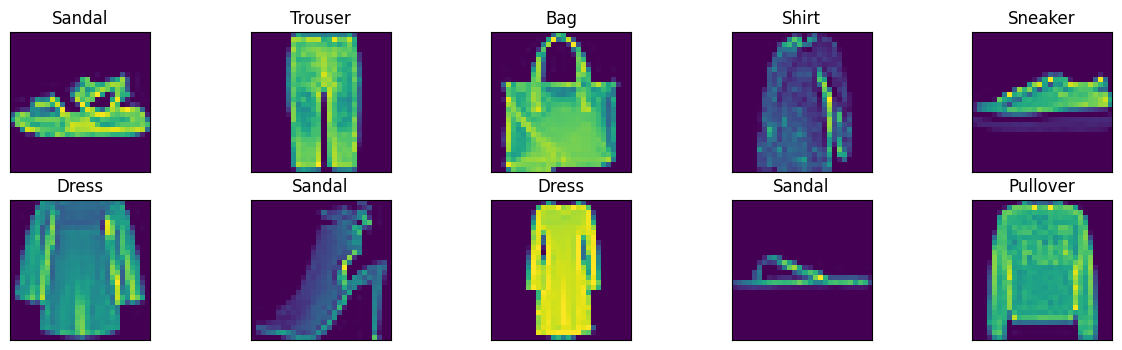

In [3]:
# Show 10 images from the training set with their labels

import matplotlib.pyplot as plt
import numpy as np


# function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()  # convert from tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # transpose dimensions


images, labels = next(iter(trainloader))  # get the first batch

# show images with labels
fig = plt.figure(figsize=(15, 4))
plot_size = 10

for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size // 2, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(get_class_name(int(labels[idx])))

In [4]:
# Load a pre-trained MobileNetV3 and inspect its structure
import torchvision.models as models

mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)
print(mobilenet_v3_model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 51.6MB/s]

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [5]:
# Replace <MASK> to complete this code cell

import torch.nn.functional as F
import torchvision.models as models
from torch import nn


# Define a model class that extends the nn.Module class
class MobileNetV3(nn.Module):
    def __init__(self):
        super(MobileNetV3, self).__init__()

        # Load the pre-trained MobileNetV3 (Small) architecture
        self.model = models.mobilenet_v3_small(pretrained=True)

        # Replace the last fully-connected layer with a new one of the right size
        self.model.classifier[3] = nn.Linear(1024, 10)

        # Freeze all the weights of the network except for the last fully-connected layer
        self.freeze()

    def forward(self, x):
        # Convert 1x28x28 input tensor to 3x28x28 tensor, to convert it to a color image
        x = x.repeat(1, 3, 1, 1)

        # Resize the input to 224x224, since MobileNetV3 (Small) expects images of that size
        if x.shape[2:] != (224, 224):
            x = F.interpolate(x, size=(224, 224), mode="bilinear", align_corners=False)

        # Forward pass
        return self.model(x)

    def freeze(self):
        # Freeze all the weights of the network except for the last fully-connected layer
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze the final layer
        for param in self.model.classifier[3].parameters():
            param.requires_grad = True

    def unfreeze(self):
        # Unfreeze all the weights of the network
        for param in self.model.parameters():
            param.requires_grad = True


# Create an instance of the MobileNetV3 model
model = MobileNetV3()
print(model)

MobileNetV3(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2d

In [6]:
# Replace <MASK> to complete this code cell

import torch
import torch.nn as nn

# Define the loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [9]:
# Set the device as GPU, MPS, or CPU according to availability
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cpu


In [ ]:
# SOLUTION

# Create a PyTorch training loop

model = model.to(device)  # Move the model weights to the device

epochs = 1
for epoch in range(epochs):
    for batch_num, (images, labels) in enumerate(trainloader):
        # Move tensors to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero out the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss and perform backprop
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print the loss for every 100th iteration
        if (batch_num) % 100 == 0:
            print(
                "Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, epochs, batch_num + 1, len(trainloader), loss.item()
                )
            )

Epoch [1/1], Batch [1/938], Loss: 2.3139


In [ ]:
# SOLUTION

# Print the loss and accuracy on the test set
correct = 0
total = 0
loss = 0

for images, labels in testloader:
    # Move tensors to the configured device
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss += loss_fn(outputs, labels)

    # torch.max return both max and argmax. We get the argmax here.
    _, predicted = torch.max(outputs.data, 1)

    # Compute the accuracy
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(
    "Test Accuracy of the model on the test images: {} %".format(100 * correct / total)
)
print("Test Loss of the model on the test images: {}".format(loss))

In [ ]:
# Plotting a few examples of correct and incorrect predictions

import matplotlib.pyplot as plt
import numpy as np

# Get the first batch of images and labels
images, labels = next(iter(testloader))

# Move tensors to the configured device
images = images.to(device)
labels = labels.to(device)

# Forward pass
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# Plot the images with labels, at most 10
fig = plt.figure(figsize=(15, 4))

for idx in np.arange(min(10, len(images))):
    ax = fig.add_subplot(2, 10 // 2, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images.cpu()[idx]))
    ax.set_title(
        "{} ({})".format(get_class_name(predicted[idx]), get_class_name(labels[idx])),
        color=("green" if predicted[idx] == labels[idx] else "red"),
    )